In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('datos_obesidad.csv')
dataframe.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [7]:
columnasdf = dataframe.columns
vardep = columnasdf[len(columnasdf)-1]
for i in columnasdf:
    print("\n",dataframe.groupby(i).size())


 Age
14.000000    1
15.000000    1
16.000000    9
16.093234    1
16.129279    1
            ..
55.022494    1
55.137881    1
55.246250    1
56.000000    1
61.000000    1
Length: 1402, dtype: int64

 Gender
Female    1043
Male      1068
dtype: int64

 Height
1.450000    1
1.456346    1
1.480000    1
1.481682    1
1.483284    1
           ..
1.931263    1
1.942725    1
1.947406    1
1.975663    1
1.980000    1
Length: 1574, dtype: int64

 Weight
39.000000     1
39.101805     1
39.371523     1
39.695295     1
39.850137     1
             ..
155.872093    1
160.639405    1
160.935351    1
165.057269    1
173.000000    1
Length: 1525, dtype: int64

 CALC
Always           1
Frequently      70
Sometimes     1401
no             639
dtype: int64

 FAVC
no      245
yes    1866
dtype: int64

 FCVC
1.000000     33
1.003566      1
1.005578      1
1.008760      1
1.031149      1
           ... 
2.996717      1
2.997524      1
2.997951      1
2.998441      1
3.000000    652
Length: 810, dtype: int64

In [11]:
generos = {"Male": 1, "Female": 2}
categorias = {"Insufficient_Weight": 1, "Normal_Weight": 2, "Overweight_Level_I": 3, "Overweight_Level_II": 4, "Obesity_Type_I":5, "Obesity_Type_II":6,
              "Obesity_Type_III":7}
yesno = {"no":1, "yes":2}
frecuencia = {"no": 1, "Sometimes":2, "Frequently":3, "Always":4}
x = dataframe.drop(vardep, axis=1)

x["FCVC"] = x["FCVC"].round().astype(int)
x["Gender"] = x["Gender"].map(generos)
columnasyn = ["FAVC","SCC","SMOKE","family_history_with_overweight"]
for i in columnasyn:
    x[i] = x[i].map(yesno)
x["CALC"] = x["CALC"].map(frecuencia)
x["CAEC"] = x["CAEC"].map(frecuencia)

"""dummies = pd.get_dummies(dataframe["MTRANS"],prefix = "MTRANS")
dummies[["MTRANS_Automobile", "MTRANS_Bike", "MTRANS_Motorbike", "MTRANS_Public_Transportation",
         "MTRANS_Walking"]] = dummies[["MTRANS_Automobile","MTRANS_Bike", "MTRANS_Motorbike", "MTRANS_Public_Transportation",
                                       "MTRANS_Walking"]].astype(int)
                                       
x = x.drop("MTRANS", axis = 1)
x = pd.concat([x,dummies], axis = 1)"""

clasificaciontrans = {"Automobile":1, "Bike":2, "Motorbike":3, "Public_Transportation":4, "Walking":5}
x["MTRANS"] = x["MTRANS"].map(clasificaciontrans)

y = dataframe[vardep]
y = y.map(categorias)

In [13]:
x.info()
print("\n",vardep)
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int32  
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

0    2
1    2
2    2
3    3
4    4
Name: NObeyesdad, dtype: int64

In [15]:
x.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.0,2,1.62,64.0,1,1,2,3.0,1,1,2.0,2,0.0,1.0,2,4
1,21.0,2,1.52,56.0,2,1,3,3.0,2,2,3.0,2,3.0,0.0,2,4
2,23.0,1,1.80,77.0,3,1,2,3.0,1,1,2.0,2,2.0,1.0,2,4
3,27.0,1,1.80,87.0,3,1,3,3.0,1,1,2.0,1,2.0,0.0,2,5
4,22.0,1,1.78,89.8,2,1,2,1.0,1,1,2.0,1,0.0,0.0,2,4


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_esc = scaler.fit_transform(x_train)
x_test_esc = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=3)

knn_mm.fit(x_train_esc,y_train)

predicciones=knn_mm.predict(x_test_esc)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_test,predicciones,target_names=list(categorias.keys())))

                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.91      0.84        78
      Normal_Weight       0.57      0.45      0.50        82
 Overweight_Level_I       0.66      0.65      0.66        88
Overweight_Level_II       0.76      0.74      0.75        84
     Obesity_Type_I       0.82      0.83      0.83       115
    Obesity_Type_II       0.89      0.96      0.92        96
   Obesity_Type_III       0.99      0.98      0.98        91

           accuracy                           0.79       634
          macro avg       0.78      0.79      0.78       634
       weighted avg       0.79      0.79      0.79       634



Menor tasa de error:  0.16246056782334384 
Neighbors:  1


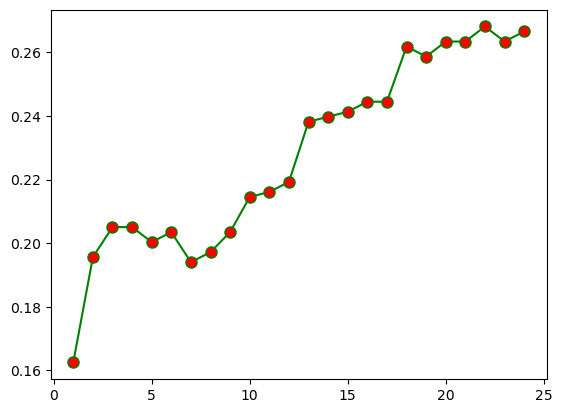

In [21]:
tasa_error = []
for i in range(1,25):
    knn_mm =KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train_esc,y_train)
    prediccion_i=knn_mm.predict(x_test_esc)
    tasa_error.append(np.mean(prediccion_i != y_test))

menor = min(tasa_error)
neighbor = tasa_error.index(menor) + 1

valores = range(1,25)
plt.plot(valores,tasa_error,color='green',marker='o', markerfacecolor='red',markersize='8')
print("Menor tasa de error: ", menor, "\nNeighbors: ", neighbor)

In [23]:
knn_mm = KNeighborsClassifier(n_neighbors=neighbor)
knn_mm.fit(x_train_esc,y_train)
predicciones=knn_mm.predict(x_test_esc)
print(classification_report(y_test,predicciones,target_names=list(categorias.keys())))

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.91      0.87        78
      Normal_Weight       0.73      0.54      0.62        82
 Overweight_Level_I       0.77      0.74      0.76        88
Overweight_Level_II       0.76      0.81      0.79        84
     Obesity_Type_I       0.81      0.90      0.86       115
    Obesity_Type_II       0.92      0.94      0.93        96
   Obesity_Type_III       1.00      0.98      0.99        91

           accuracy                           0.84       634
          macro avg       0.83      0.83      0.83       634
       weighted avg       0.84      0.84      0.83       634



In [29]:
from sklearn.svm import SVC

modeloSVC = SVC(kernel='linear', C=1.0)  # C = parámetro de regularización
modeloSVC.fit(x_train_esc, y_train)

prediccionesSVC=modeloSVC.predict(x_test_esc)

In [31]:
print(classification_report(y_test,prediccionesSVC,target_names=list(categorias.keys())))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        78
      Normal_Weight       0.96      0.88      0.92        82
 Overweight_Level_I       0.89      0.97      0.92        88
Overweight_Level_II       1.00      0.90      0.95        84
     Obesity_Type_I       0.99      0.99      0.99       115
    Obesity_Type_II       0.98      1.00      0.99        96
   Obesity_Type_III       1.00      0.99      0.99        91

           accuracy                           0.96       634
          macro avg       0.96      0.96      0.96       634
       weighted avg       0.97      0.96      0.96       634



Menor tasa de error:  0.026813880126182965 
Neighbors:  4.0


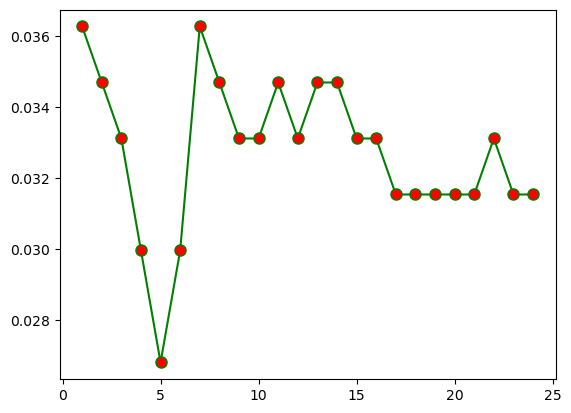

In [39]:
tasa_errorSVC = []
for i in range(1,25):
    modeloSVC =SVC(kernel='linear', C=float(i))
    modeloSVC.fit(x_train_esc,y_train)
    modeloSVC_i=modeloSVC.predict(x_test_esc)
    tasa_errorSVC.append(np.mean(modeloSVC_i != y_test))

menor_SVC = min(tasa_errorSVC)
c_SVC = float(tasa_errorSVC.index(menor))

valores = range(1,25)
plt.plot(valores,tasa_errorSVC,color='green',marker='o', markerfacecolor='red',markersize='8')
print("Menor tasa de error: ", menor_SVC, "\nNeighbors: ", c_SVC)

In [41]:
modeloSVC = SVC(kernel='linear', C=c_SVC)  # C = parámetro de regularización
modeloSVC.fit(x_train_esc, y_train)

prediccionesSVC=modeloSVC.predict(x_test_esc)

print(classification_report(y_test,prediccionesSVC,target_names=list(categorias.keys())))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        78
      Normal_Weight       0.96      0.95      0.96        82
 Overweight_Level_I       0.92      0.95      0.94        88
Overweight_Level_II       0.99      0.90      0.94        84
     Obesity_Type_I       0.98      0.99      0.99       115
    Obesity_Type_II       0.98      0.99      0.98        96
   Obesity_Type_III       1.00      0.99      0.99        91

           accuracy                           0.97       634
          macro avg       0.97      0.97      0.97       634
       weighted avg       0.97      0.97      0.97       634



In [49]:
#datos_obesidad = np.array([[20.0,1,1.65,70.0,1,1,2,3.0,1,1,2.0,2,2.0,1.0,1,0,0,0,1,0]])
datos_obesidad = np.array([[20.0,1,1.65,70.0,1,1,2,3.0,1,1,2.0,2,2.0,1.0,1,3]])
datos_obesidad_esc = scaler.transform(pd.DataFrame(datos_obesidad,columns=x.columns))
print(modeloSVC.predict(datos_obesidad_esc))
#print(modeloSVC.predict_proba(datos_obesidad_esc))

[3]
